In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

/Users/hebotao/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Users/hebotao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [8]:
import os
for dirname, _, filenames in os.walk('/Users/hebotao/Desktop/2020/Data Science'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/hebotao/Desktop/2020/Data Science/.DS_Store
/Users/hebotao/Desktop/2020/Data Science/Five Personalities.ipynb
/Users/hebotao/Desktop/2020/Data Science/output.csv
/Users/hebotao/Desktop/2020/Data Science/test.csv
/Users/hebotao/Desktop/2020/Data Science/train.csv
/Users/hebotao/Desktop/2020/Data Science/.ipynb_checkpoints/Five Personalities-checkpoint.ipynb


In [33]:
df_train = pd.read_csv('train.csv')
train_length = len(df_train)
df_test = pd.read_csv('test.csv')
df_train.rename(columns = {'Personality (Class label)':'Personality'}, inplace = True) 
df_test.rename(columns = {'Personality (class label)':'Personality'}, inplace = True) 
df = pd.concat([df_train, df_test])
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


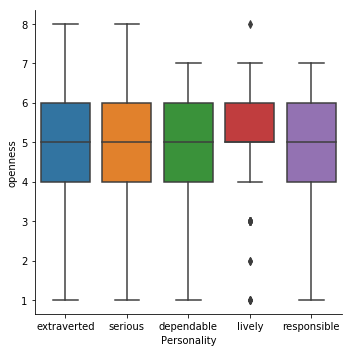

In [34]:
sns.catplot(x="Personality", y="openness", kind="box", data=df)

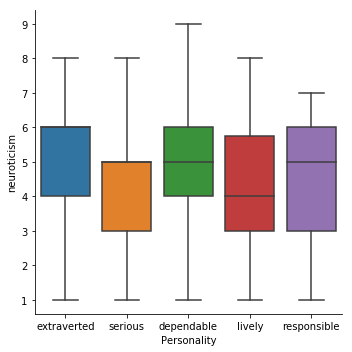

In [35]:
sns.catplot(x="Personality", y="neuroticism", kind="box", data=df)

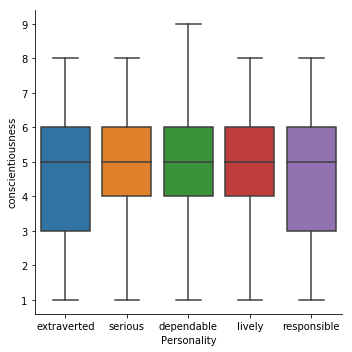

In [36]:
sns.catplot(x="Personality", y="conscientiousness", kind="box", data=df)

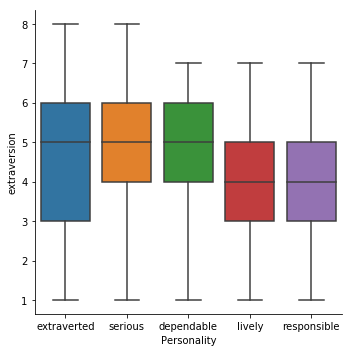

In [37]:
sns.catplot(x="Personality", y="extraversion", kind="box", data=df)

In [38]:
df['Gender'] = df['Gender'].map({'Male': 0,
                                 'Female': 1})

df['Personality'] = df['Personality'].map({'dependable': 0,
                                           'extraverted': 1,
                                           'lively': 2,
                                           'responsible': 3,
                                           'serious': 4})
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,0.0,17,7,4,7,3,2,1
1,0.0,19,4,5,4,6,6,4
2,1.0,18,7,6,4,5,5,0
3,1.0,22,5,6,7,4,3,1
4,1.0,19,7,4,6,5,4,2


In [39]:
# Now let's check for rows with null values.
df[df.isnull().sum(axis=1) > 0]

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
449,NaN,21,2,5,6,1,5,4


In [52]:
df.groupby(by=['Personality', 'Age']).mean().loc[4]

,Gender,openness,neuroticism,conscientiousness,agreeableness,extraversion
Age,,,,,,
17,0.375000,4.916667,4.208333,5.041667,4.291667,5.375000
18,0.531250,5.000000,4.656250,5.109375,4.968750,4.843750
19,0.506024,4.710843,4.253012,4.433735,5.228916,5.156627
20,0.250000,4.975000,4.225000,5.200000,4.925000,4.825000
21,0.406250,4.575758,4.424242,5.030303,5.030303,5.030303
22,0.476190,5.142857,4.190476,4.619048,5.095238,4.476190
23,0.133333,4.466667,4.133333,4.933333,5.000000,5.000000
24,0.400000,4.866667,4.466667,5.133333,3.933333,5.666667
25,0.500000,5.125000,3.875000,5.375000,4.625000,5.250000


In [53]:
df.at[449, 'Gender'] = 0

# Correlation matrix

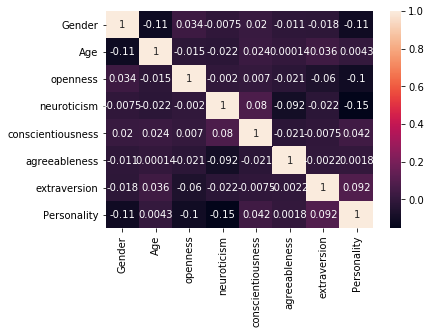

In [54]:
sns.heatmap(df.corr(), annot=True)

In [55]:
df.skew()

Gender              -0.093991
Age                  0.471614
openness            -0.638642
neuroticism         -0.412167
conscientiousness   -0.412381
agreeableness       -0.552094
extraversion        -0.359830
Personality         -0.140035
dtype: float64

In [56]:
df['openness'] = np.sqrt(max(df['openness']+1) - df['openness'])
df['agreeableness'] = np.sqrt(max(df['agreeableness']+1) - df['agreeableness'])
df.skew()

Gender              -0.093991
Age                  0.471614
openness             0.234889
neuroticism         -0.412167
conscientiousness   -0.412381
agreeableness        0.107320
extraversion        -0.359830
Personality         -0.140035
dtype: float64

In [59]:
df_train = df[:train_length]
df_test = df[train_length:]
Y, X = df_train.values[:,-1], df_train.values[:,:-1]
Y_test, X_test = df_test.values[:,-1], df_test.values[:,:-1]
X = RobustScaler().fit_transform(X)
X_test = RobustScaler().fit_transform(X_test)

When we write machine learning models, we very often start with the i.i.d. assumption: that is, we assume that our datapoints come from the same data-generating process, which also means that our training and testing sets are assumed to be identically distributed.
Let's see if this assumption holds in our case, by checking the distributions of personality labels in both our datasets:

In [62]:
df_train['Personality'].value_counts()/len(df_train)

4    0.227080
1    0.211566
0    0.194640
2    0.188999
3    0.177715
Name: Personality, dtype: float64